In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import  make_pipeline, Pipeline
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

##  Sklearn `load_breast_cancer` 데이터셋 

`sklearn.datasets.load_breast_cancer` 함수로 로드한 데이터셋은 유방암 진단을 위한 **이진 분류(Binary Classification)** 데이터셋입니다. `as_frame=True` 옵션을 사용했기 때문에, 데이터는 Pandas DataFrame 형태로 로드되며, 이는 딕셔너리 형태의 `Bunch` 객체 내에 다양한 속성으로 저장됩니다.

주요 속성(Attributes)과 해당 속성의 의미는 다음과 같습니다.

| 속성명 | Type (as_frame=True 시) | 설명 |
| :--- | :--- | :--- |
| `data` | `pandas.DataFrame` | **특징(Feature) 데이터**입니다. 각 행은 하나의 샘플(세포 핵 관찰 기록)을 나타내며, 총 569개의 샘플이 있습니다. 열은 30개의 특징을 나타냅니다. |
| `target` | `pandas.Series` | **분류 목표(Target) 변수**입니다. 각 샘플에 대한 진단 결과(레이블)를 나타냅니다. 0 또는 1의 값을 가집니다. |
| `frame` | `pandas.DataFrame` | `data`와 `target`을 하나의 DataFrame으로 결합한 형태입니다. 질문에서 요청하신 `cancer['frame']`이 바로 이 전체 DataFrame입니다. (총 569행, 31열) |
| `target_names` | `numpy.ndarray` | `target` 레이블(0, 1)이 의미하는 바의 이름입니다. 일반적으로 **`['malignant', 'benign']`** 순서로 되어 있습니다. |
| `feature_names` | `numpy.ndarray` | `data` DataFrame의 컬럼(열) 이름이 되는 30개의 특징 이름입니다. |
| `DESCR` | `str` | 데이터셋에 대한 전체 설명입니다. 데이터 출처, 속성 정보, 요약 통계 등을 포함합니다. |

---

###  특징(Feature) 설명 (`feature_names`)

이 데이터셋의 특징은 세포핵의 이미지에서 계산된 10가지 특성(예: 반지름, 질감, 둘레, 면적 등)을 기반으로 하며, 각 특성에 대해 **평균(mean)**, **표준 오차(standard error - se)**, **가장 큰 값(worst/largest)**의 3가지 측정값이 제공되어 총 $10 \times 3 = 30$개의 특징이 구성됩니다.

| 특징 그룹 | 접미사 | 설명 |
| :--- | :--- | :--- |
| **평균** | `mean` | 각 특성의 평균값입니다. (예: `mean radius`) |
| **표준 오차** | `se` | 각 특성의 표준 오차입니다. (예: `radius error`) |
| **최대/가장 큰 값** | `worst` | 각 특성의 가장 큰(worst) 값, 또는 극한 값의 평균입니다. (예: `worst radius`) |

**10가지 기본 특성:**

1.  **Radius (반지름):** 핵의 평균 거리
2.  **Texture (질감):** 표면의 회색조 값의 표준 편차
3.  **Perimeter (둘레):** 핵의 둘레
4.  **Area (면적):** 핵의 면적
5.  **Smoothness (평활도):** 반경 길이의 변화
6.  **Compactness (조밀도):** 둘레 제곱 / 면적 - 1.0
7.  **Concavity (오목함):** 윤곽선 오목한 부분의 심각도
8.  **Concave points (오목점):** 윤곽선 오목한 부분의 수
9.  **Symmetry (대칭):** 핵의 대칭성
10. **Fractal dimension (프랙탈 차원):** 윤곽선의 복잡도

---

###  타겟(Target) 설명 (`target` 및 `target_names`)

`target` 컬럼은 분류하려는 목표 변수이며, 유방 종양의 진단 결과를 나타냅니다.

* **`target` 값 0:** **Malignant (악성)** - 암입니다.
* **`target` 값 1:** **Benign (양성)** - 암이 아닙니다.

이 데이터셋은 0을 악성(Malignant)으로, 1을 양성(Benign)으로 레이블링하고 있다는 점을 유의해야 합니다.

`cancer['frame']`에는 이 30개의 특징 컬럼과 마지막에 `target` 컬럼이 모두 포함되어 있습니다.


In [3]:
cancer = load_breast_cancer(as_frame=True)
df = cancer['frame']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


과제
=================
1. 정규화 하기
2. train ,test  나누기
3. train, test 정확도구하기
4. train, test confusion matrix 와 heatmap 구하기
------------
pipeline을 이용하여 학습하기
1. train, test 정확도구하기
2. train, test confusion matrix 와 heatmap 구하기

boston data
----------
pipe 라인을 이용하여 학습하고
test 0번째 컬럼 예측하기


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

1. 정규화 하기

In [5]:
standard=StandardScaler()
x_scale=standard.fit_transform(x)
#y는 스케일 필요 x

2. train ,test  나누기

In [6]:
x_train,x_test,y_train,y_test=train_test_split(
    x_scale,
    y,
    test_size=0.3,
    stratify=y
)

In [7]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


3. train, test 정확도구하기

In [8]:
print("traindata: ",model.score(x_train,y_train))
print("testdata: ",model.score(x_test,y_test))

traindata:  0.9874371859296482
testdata:  0.9532163742690059


4. train, test confusion matrix 와 heatmap 구하기

In [9]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)
c_train=confusion_matrix(y_train,pred_train)
c_test=confusion_matrix(y_test,pred_test)

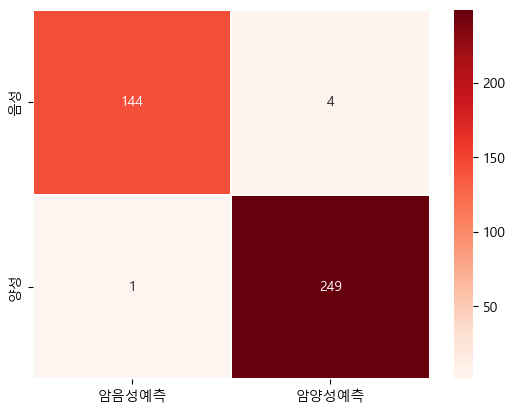

In [10]:
sb.heatmap( c_train, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
            xticklabels=['암음성예측','암양성예측'],
            yticklabels=['음성','양성'])
plt.show()

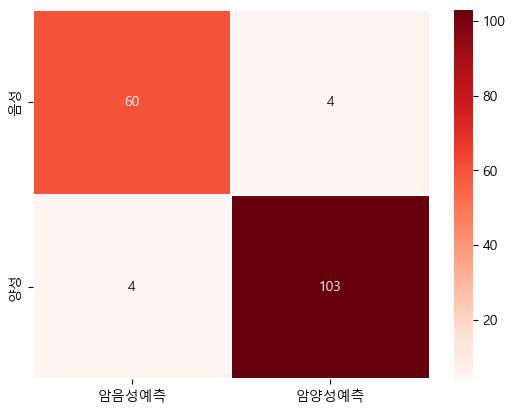

In [11]:
sb.heatmap( c_test, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['암음성예측','암양성예측'],
           yticklabels=['음성','양성'])
plt.show()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
    stratify=y
)

pipeline을 이용하여 학습하기
1. train, test 정확도구하기
2. train, test confusion matrix 와 heatmap 구하기

In [13]:
model_pipe = Pipeline( [('scaler', StandardScaler()),
                        ('regress', LogisticRegression(max_iter=500) ) ]  
                    )
model_pipe.fit( x_train, y_train)

,steps,"[('scaler', ...), ('regress', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [14]:
print(model_pipe.score(x_train,y_train))
print(model_pipe.score(x_test,y_test))

0.9899497487437185
0.9824561403508771


1. 정규화 하기
2. train ,test  나누기


In [15]:
df = pd.read_csv('../data/Boston.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
pipe=Pipeline([
    ('scaler', StandardScaler()),   
    ('regressor', SGDRegressor(max_iter=500))
])

In [17]:
x_train,x_test,y_train,y_test=train_test_split(
    x,
    y,
    test_size=0.3,
)

In [18]:
pipe.fit(x_train,y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
